Part -2) Apply data augmentation to generate new images and then build and analyze same model used in part-1

In [1]:
#Unsupervised Learning
#Import Libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import pathlib
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [2]:
!rm -r sample_data/

In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  inflating: brain

In [4]:
#loading dataset
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image, ImageOps
import numpy as np

file_path="brain_tumor_dataset"
yes_files = os.listdir(file_path + "/yes")
no_files = os.listdir(file_path + "/no")
yes_images = []
yes_lbl = []
no_images = []
no_lbl = []

for i in yes_files:
  image = PIL.Image.open("brain_tumor_dataset/yes/"+i)
  image_resize = image.resize((128,128))
  image_array = np.array(image_resize)
  if(image_array.shape == (128,128,3)):
    yes_images.append(np.array(image_array))
    yes_lbl.append(1)
print(len(yes_files))

for i in no_files:
  image = PIL.Image.open("brain_tumor_dataset/no/"+i)
  image_resize = image.resize((128,128))
  image_array = np.array(image_resize)
  if(image_array.shape == (128,128,3)):
    no_images.append(np.array(image_array))
    no_lbl.append(0)
print(len(no_files))

yes_images = np.array(yes_images)
no_images = np.array(no_images)

155
98


In [5]:
#Normalizing the pixel value

yes_images = (yes_images - 127.5) / 127.5  # Normalize the images to [-1, 1]
no_images = (no_images - 127.5) / 127.5

In [6]:
print(yes_images)

[[[[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]]

  ...

  [[-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   ...
   [-1.         -1.         -1.        ]
   [-1.         -1.         -1.        ]
   [-1.         

In [7]:
#printing shape
print(yes_images.shape)
print(no_images.shape)

(138, 128, 128, 3)
(79, 128, 128, 3)


In [8]:
#shuffling data and converting it to tensorflow dataset
train_yes_image = (tf.data.Dataset.from_tensor_slices(yes_images).shuffle(len(yes_images)).batch(30))
train_no_image = (tf.data.Dataset.from_tensor_slices(no_images).shuffle(len(no_images)).batch(30))

In [9]:
print(train_yes_image)

<BatchDataset element_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float64, name=None)>


In [10]:
#Building Generative Model
#function to create model
def create_generator_model():

    model = tf.keras.Sequential()

    model.add(layers.Dense(8*8*1024, use_bias=False, input_shape=(100,)))

    model.add(layers.BatchNormalization())

    model.add(layers.LeakyReLU())



    model.add(layers.Reshape((8, 8, 1024)))

    assert model.output_shape == (None, 8, 8, 1024)



    model.add(layers.Conv2DTranspose(512, (5, 5), strides=(2, 2), padding='same', use_bias=False))

    assert model.output_shape == (None, 16, 16, 512)

    model.add(layers.BatchNormalization())

    model.add(layers.LeakyReLU())



    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))

    assert model.output_shape == (None, 32, 32, 256)

    model.add(layers.BatchNormalization())

    model.add(layers.LeakyReLU())



    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))

    assert model.output_shape == (None, 64, 64, 128)

    model.add(layers.BatchNormalization())

    model.add(layers.LeakyReLU())



    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))

    assert model.output_shape == (None, 128, 128, 64)

    model.add(layers.BatchNormalization())

    model.add(layers.LeakyReLU())



    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))

    assert model.output_shape == (None, 128, 128,3)



    return model

In [11]:
#calling function to build model
generator_yes_model = create_generator_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65536)             6553600   
                                                                 
 batch_normalization (BatchN  (None, 65536)            262144    
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 65536)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 1024)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 512)      13107200  
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 512)      2

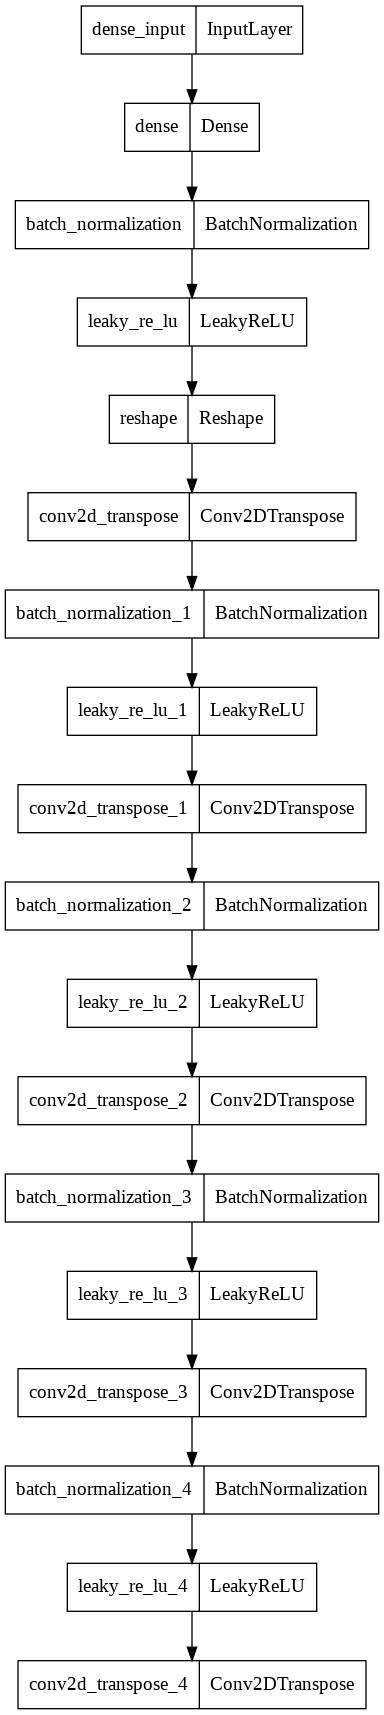

In [12]:
# Printing the sumary of the model.
generator_yes_model.summary()
# Generating the model structure
plot_model(generator_yes_model, to_file='generator_yes_model.png')

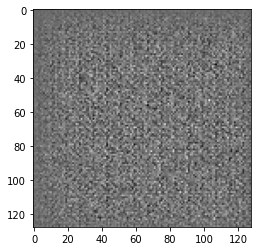

In [13]:
#generating sample vector
def sample_vector(number_of_sample):
  return tf.random.normal([number_of_sample,100])

#generating image
generated_yes_image = generator_yes_model(sample_vector(1), training=False)

#plotting image
def plot_image(array):
  plt.figure(figsize=(5,5))
  plt.axis('off')
  plt.imshow(array,cmap='gray')
  plt.axis('off')
  plt.show()

plt.imshow(generated_yes_image[0, :, :, 0], cmap='gray')

In [14]:
# Creating the discriminator model.
def create_discriminator_model():

    model = tf.keras.Sequential()

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',

                                     input_shape=[128, 128,3]))



    assert model.output_shape == (None, 64, 64, 64)

    model.add(layers.LeakyReLU())

    model.add(layers.Dropout(0.3))



    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))

    assert model.output_shape == (None, 32, 32, 128)

    model.add(layers.LeakyReLU())

    model.add(layers.Dropout(0.3))



    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))

    assert model.output_shape == (None, 16, 16, 256)

    model.add(layers.LeakyReLU())

    model.add(layers.Dropout(0.3))



    model.add(layers.Conv2D(512, (5, 5), strides=(1, 1), padding='same'))

    assert model.output_shape == (None, 16, 16, 512)

    model.add(layers.LeakyReLU())

    model.add(layers.Dropout(0.3))



    model.add(layers.Conv2D(1024, (5, 5), strides=(2, 2), padding='same'))

    assert model.output_shape == (None, 8, 8, 1024)

    model.add(layers.LeakyReLU())

    model.add(layers.Dropout(0.3))



    model.add(layers.Flatten())

    model.add(layers.Dense(1, activation=None))



    return model


discriminator_yes_model = create_discriminator_model()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)      

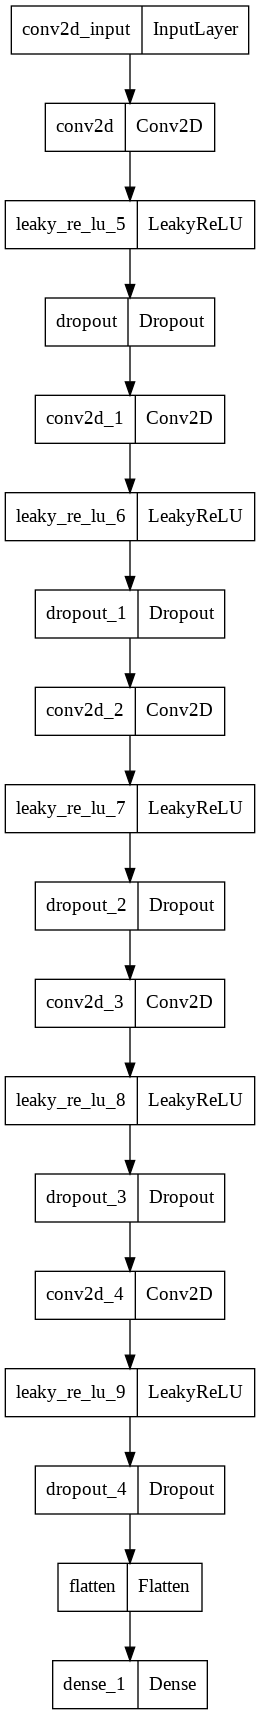

In [15]:
# Printing the sumary of the model.
discriminator_yes_model.summary()
# Generating the 
plot_model(discriminator_yes_model, to_file='discriminator_model.png')

In [16]:
#Implementing Training
#creating loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#generator optimizer
generator_optimizer = tf.keras.optimizers.Adam()

#discriminator optimizer
discriminator_optimizer = tf.keras.optimizers.Adam()

In [17]:
#creating training step function for 
@tf.function
def train_step(images):
  noise = tf.random.normal([30, 100])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator_yes_model(noise, training=True)
    real_output = discriminator_yes_model(images, training=True)
    fake_output = discriminator_yes_model(generated_images, training=True)
    gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    disc_loss = real_loss + fake_loss

  gradients_of_generator = gen_tape.gradient(gen_loss, generator_yes_model.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_yes_model.trainable_variables)
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_yes_model.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator_yes_model.trainable_variables))

In [18]:
#creating training step function
@tf.function
def train_step(images):
  noise = tf.random.normal([30, 100])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator_yes_model(noise, training=True)
    real_output = discriminator_yes_model(images, training=True)
    fake_output = discriminator_yes_model(generated_images, training=True)
    gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    disc_loss = real_loss + fake_loss

  gradients_of_generator = gen_tape.gradient(gen_loss, generator_yes_model.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_yes_model.trainable_variables)
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_yes_model.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator_yes_model.trainable_variables))

Start of epoch 0
Time taken on each step: 1.9384073257446288
Start of epoch 1
Time taken on each step: 0.3804614067077637
Start of epoch 2
Time taken on each step: 0.4519073486328125
Start of epoch 3
Time taken on each step: 0.4615484714508057
Start of epoch 4
Time taken on each step: 0.46803989410400393
Start of epoch 5
Time taken on each step: 0.46937994956970214
Start of epoch 6
Time taken on each step: 0.46340055465698243
Start of epoch 7
Time taken on each step: 0.4807000160217285
Start of epoch 8
Time taken on each step: 0.4571238994598389
Start of epoch 9
Time taken on each step: 0.4750180244445801



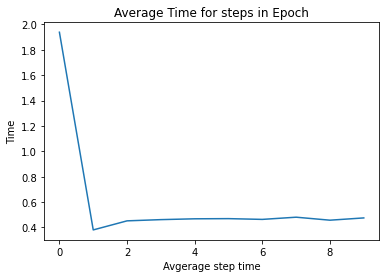

In [19]:
# Generating Tumor images
import time

epochs = 10
time_epochs = []
avg_steps = []
for epoch in range(epochs):
  print("Start of epoch %d" % (epoch,))

  time_step = []
  for step, dataset in enumerate(train_yes_image):
    start_time = time.time()
    train_step(dataset)
    time_step.append(time.time() - start_time)
  
  time_epochs.append(time_step)
  avg_steps.append(sum(time_step)/len(time_step))
  print("Time taken on each step: " + str(sum(time_step)/len(time_step)))

print()
plt.plot(avg_steps)
plt.title('Average Time for steps in Epoch')
plt.xlabel('Avgerage step time')
plt.ylabel('Time')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

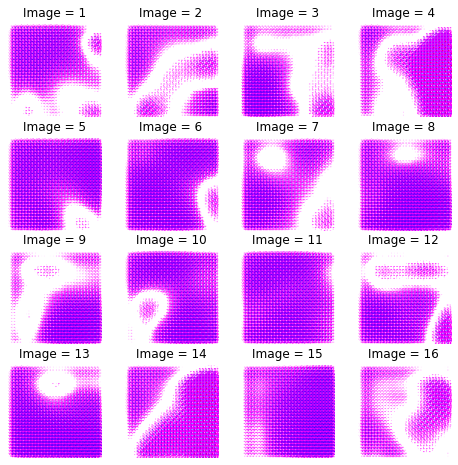

In [20]:
num_sample = 16
generated_sample = generator_yes_model.predict(sample_vector(num_sample)).reshape(num_sample,128,128,3)
generated_sample *= 127.5
generated_sample += 127.5

def display_images(dataset):
  plt.figure(figsize=(8,8))
  for i in range(16):
    plt.axis('off')
    plt.subplot(4,4,i+1)
    plt.title("Image = "+str(i+1))
    plt.imshow(dataset[i],cmap='gray')
  plt.axis('off')
  plt.show()

display_images(generated_sample)

No Tumor

In [21]:
#NO TUMOR
#creating model object for Non Tumor
#calling function to build model
generator_no_model = create_generator_model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65536)             6553600   
                                                                 
 batch_normalization_5 (Batc  (None, 65536)            262144    
 hNormalization)                                                 
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 65536)             0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 1024)        0         
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 16, 16, 512)      13107200  
 ranspose)                                                       
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 512)     

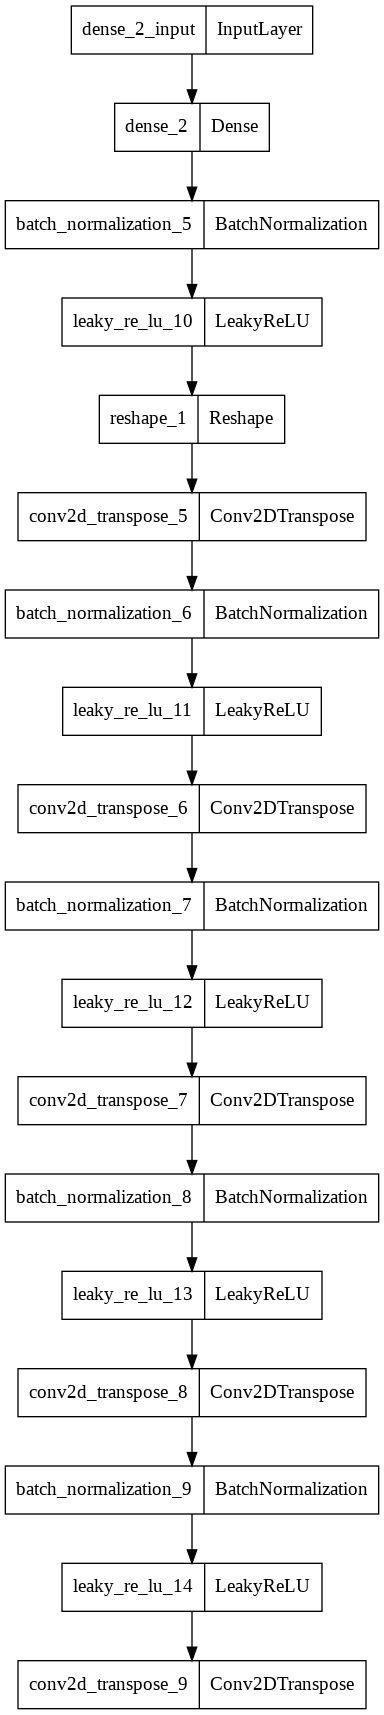

In [22]:
# Printing the sumary of the model.
generator_no_model.summary()
# Generating the 
plot_model(generator_no_model, to_file='generator_no_model.png')

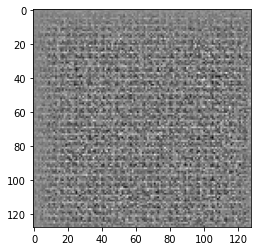

In [23]:
#generating sample vector
def sample_vector_noTumor(number_of_sample):
  return tf.random.normal([number_of_sample,100])

#generating image
generated_no_image = generator_no_model(sample_vector_noTumor(1), training=False)

#plotting image
def plot_image(array):
  plt.figure(figsize=(5,5))
  plt.axis('off')
  plt.imshow(array,cmap='gray')
  plt.axis('off')
  plt.show()

plt.imshow(generated_no_image[0, :, :, 0], cmap='gray')

In [24]:
discriminator_no_model = create_discriminator_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        4864      
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 256)      

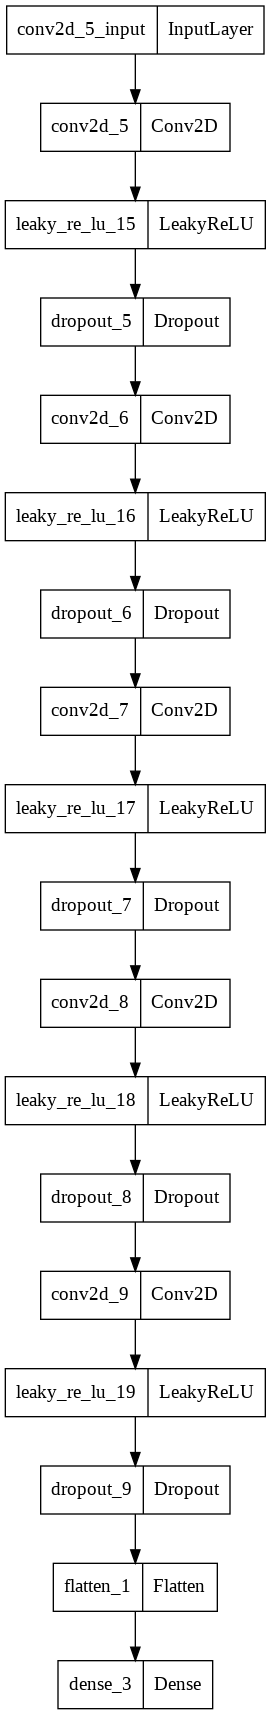

In [25]:
# Printing the sumary of the model.
discriminator_no_model.summary()
# Generating the 
plot_model(discriminator_no_model, to_file='discriminator_no_model.png')

In [26]:
#Implementing Training
#creating loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

#generator optimizer
generator_optimizer = tf.keras.optimizers.Adam()

#discriminator optimizer
discriminator_optimizer = tf.keras.optimizers.Adam()

In [27]:
#creating training step function for 
@tf.function
def train_step(images):
  noise = tf.random.normal([30, 100])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator_no_model(noise, training=True)
    real_output = discriminator_no_model(images, training=True)
    fake_output = discriminator_no_model(generated_images, training=True)
    gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    disc_loss = real_loss + fake_loss

  gradients_of_generator = gen_tape.gradient(gen_loss, generator_no_model.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_no_model.trainable_variables)
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_no_model.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator_no_model.trainable_variables))

Start of epoch 0
Time taken on each step: 1.5035439332326253
Start of epoch 1
Time taken on each step: 0.326851765314738
Start of epoch 2
Time taken on each step: 0.485732634862264
Start of epoch 3
Time taken on each step: 0.4776984055836995
Start of epoch 4
Time taken on each step: 0.48437976837158203
Start of epoch 5
Time taken on each step: 0.4830028216044108
Start of epoch 6
Time taken on each step: 0.4850607713063558
Start of epoch 7
Time taken on each step: 0.48946770032246906
Start of epoch 8
Time taken on each step: 0.4971754550933838
Start of epoch 9
Time taken on each step: 0.4952731927235921



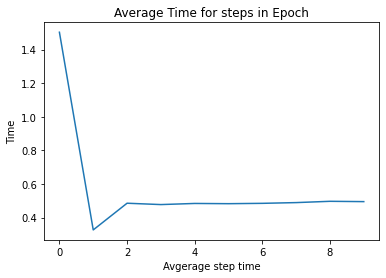

In [28]:
# Generating Tumor images
import time

epochs = 10
time_epochs = []
avg_steps = []
for epoch in range(epochs):
  print("Start of epoch %d" % (epoch,))

  time_step = []
  for step, dataset in enumerate(train_no_image):
    start_time = time.time()
    train_step(dataset)
    time_step.append(time.time() - start_time)
  
  time_epochs.append(time_step)
  avg_steps.append(sum(time_step)/len(time_step))
  print("Time taken on each step: " + str(sum(time_step)/len(time_step)))

print()
plt.plot(avg_steps)
plt.title('Average Time for steps in Epoch')
plt.xlabel('Avgerage step time')
plt.ylabel('Time')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

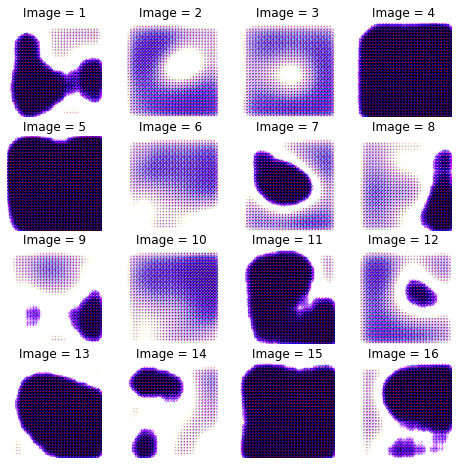

In [29]:
#displaying samples for NON Tumor
num_sample = 16
generated_sample = generator_no_model.predict(sample_vector_noTumor(num_sample)).reshape(num_sample,128,128,3)
generated_sample *= 127.5
generated_sample += 127.5

def display_images(dataset):
  plt.figure(figsize=(8,8))
  for i in range(16):
    plt.axis('off')
    plt.subplot(4,4,i+1)
    plt.title("Image = "+str(i+1))
    plt.imshow(dataset[i],cmap='gray')
  plt.axis('off')
  plt.show()

display_images(generated_sample)